Pune Property Prices
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import  numpy as np

In [2]:
main_df = pd.read_csv('Pune_rent.csv')
df = main_df.copy()
print(df.shape)
df.head()

(22800, 9)


,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,"6,750",450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,"18,000",916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,"16,500",1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,"8,000",250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,"25,000",1005,Semi-Furnished,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22800 entries, 0 to 22799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   seller_type    22800 non-null  object
 1   bedroom        22800 non-null  int64 
 2   layout_type    22800 non-null  object
 3   property_type  22800 non-null  object
 4   locality       22800 non-null  object
 5   price          22800 non-null  object
 6   area           22800 non-null  int64 
 7   furnish_type   22800 non-null  object
 8   bathroom       22629 non-null  object
dtypes: int64(2), object(7)
memory usage: 1.6+ MB


In [4]:
# Price's Dtype is category which needs to be fixed 
# Repalcing the ',' with '' and then making the Dtype as float
df['price']=df['price'].str.replace(',','').astype('float')

In [5]:
df.isna().mean()*100

seller_type      0.00
bedroom          0.00
layout_type      0.00
property_type    0.00
locality         0.00
price            0.00
area             0.00
furnish_type     0.00
bathroom         0.75
dtype: float64

In [6]:
df[df['bathroom'].isna()].head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
14,OWNER,2,BHK,Independent Floor,Pimple Nilakh,18000.0,950,Semi-Furnished,NaN
34,OWNER,1,BHK,Apartment,Chinchwad,10000.0,700,Semi-Furnished,NaN
81,OWNER,2,BHK,Apartment,Mundhwa,10000.0,900,Semi-Furnished,NaN
124,OWNER,2,BHK,Independent Floor,Pimple Nilakh,18000.0,950,Semi-Furnished,NaN
174,OWNER,1,BHK,Apartment,Chinchwad,10000.0,700,Semi-Furnished,NaN


In [7]:
df.sample(5)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
4334,AGENT,2,BHK,Apartment,Hinjewadi,22000.0,1235,Unfurnished,2
4924,AGENT,2,BHK,Apartment,Hinjewadi,15000.0,1145,Semi-Furnished,2
10904,AGENT,1,BHK,Apartment,Rahatani,15000.0,617,Unfurnished,1
7988,AGENT,2,BHK,Apartment,Wakad,20000.0,1150,Unfurnished,2
9136,AGENT,2,BHK,Apartment,Bavdhan,18000.0,1050,Semi-Furnished,2


In [8]:
df_with_bathroom_nan = df[df['bathroom'].isna()]
print(df_with_bathroom_nan.shape)
df_with_bathroom_nan.sample(5)

(171, 9)


,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
4750,AGENT,2,BHK,Apartment,Hadapsar,55000.0,1200,Furnished,NaN
20857,OWNER,1,BHK,Apartment,Hinjewadi,16500.0,680,Semi-Furnished,NaN
14099,OWNER,1,RK,Studio Apartment,Karve Nagar,11000.0,504,Unfurnished,NaN
5017,AGENT,1,BHK,Independent House,Wakad,13200.0,500,Unfurnished,NaN
15570,OWNER,1,BHK,Independent House,Pratibha Nagar,10000.0,800,Furnished,NaN


In [9]:
# Fixing the nan values with logic (number of bathroom = number of bedroom)
df_with_bathroom_nan['bathroom'] = df_with_bathroom_nan['bedroom']

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_41312\3940925542.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_bathroom_nan['bathroom'] = df_with_bathroom_nan['bedroom']


In [10]:
df_with_bathroom_nan.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
14,OWNER,2,BHK,Independent Floor,Pimple Nilakh,18000.0,950,Semi-Furnished,2
34,OWNER,1,BHK,Apartment,Chinchwad,10000.0,700,Semi-Furnished,1
81,OWNER,2,BHK,Apartment,Mundhwa,10000.0,900,Semi-Furnished,2
124,OWNER,2,BHK,Independent Floor,Pimple Nilakh,18000.0,950,Semi-Furnished,2
174,OWNER,1,BHK,Apartment,Chinchwad,10000.0,700,Semi-Furnished,1


In [11]:
df2 = df.dropna()

In [12]:
# Dropping the NaN from the Previous Df
# making a new df with (nan fixed df) and (nan dropped df) 
df3 = pd.concat([df2,df_with_bathroom_nan], axis='rows')

In [13]:
df3.isna().sum()

seller_type      0
bedroom          0
layout_type      0
property_type    0
locality         0
price            0
area             0
furnish_type     0
bathroom         0
dtype: int64

<AxesSubplot: xlabel='locality'>

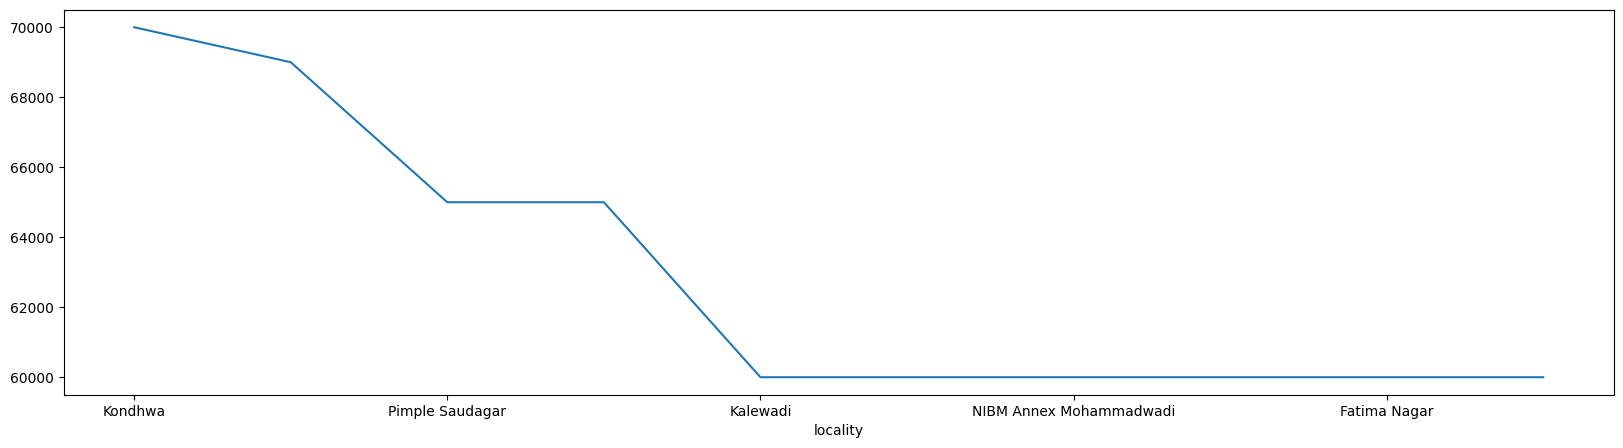

In [14]:
plt.figure(figsize=(20,5))
df3.groupby(['locality'])['price'].max().sort_values(ascending=False)[30:40].plot()

Obseravtion:

Price gets affected by locality

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22800 entries, 0 to 22775
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   seller_type    22800 non-null  object 
 1   bedroom        22800 non-null  int64  
 2   layout_type    22800 non-null  object 
 3   property_type  22800 non-null  object 
 4   locality       22800 non-null  object 
 5   price          22800 non-null  float64
 6   area           22800 non-null  int64  
 7   furnish_type   22800 non-null  object 
 8   bathroom       22800 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 1.7+ MB


In [16]:
df3.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom
0,OWNER,1,BHK,Independent Floor,Mundhwa,6750.0,450,Unfurnished,1
1,OWNER,2,BHK,Apartment,Wakad,18000.0,916,Unfurnished,2
2,OWNER,3,BHK,Apartment,Wagholi,16500.0,1085,Semi-Furnished,3
3,OWNER,1,RK,Studio Apartment,Kothrud,8000.0,250,Furnished,1
4,OWNER,2,BHK,Apartment,Yerawada,25000.0,1005,Semi-Furnished,2


In [17]:
#Making a new colums as price per sq.ft
df3['price_per_area']=df3['price']/df3['area']

In [18]:
df3.sample(10)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,price_per_area
2040,AGENT,2,BHK,Apartment,Wagholi,13000.0,980,Semi-Furnished,2,13.265306
809,AGENT,1,BHK,Apartment,Hinjewadi,9000.0,450,Unfurnished,1,20.000000
5617,AGENT,2,BHK,Apartment,Wagholi,14700.0,1036,Unfurnished,2,14.189189
2958,AGENT,3,BHK,Apartment,Pashan,24000.0,1300,Semi-Furnished,2,18.461538
11192,AGENT,3,BHK,Apartment,Wagholi,24000.0,1652,Semi-Furnished,3,14.527845
5317,AGENT,2,BHK,Apartment,Wakad,19000.0,1050,Unfurnished,2,18.095238
19721,OWNER,2,BHK,Apartment,Dhayari,15000.0,956,Semi-Furnished,2,15.690377
5964,AGENT,4,BHK,Apartment,Baner,60000.0,2500,Semi-Furnished,4,24.000000
1855,AGENT,2,BHK,Apartment,Akurdi,16000.0,900,Semi-Furnished,2,17.777778
6413,AGENT,2,BHK,Apartment,Wadgaon Sheri,18000.0,1000,Furnished,2,18.000000


In [19]:
#Removing outliers
df3['z_score']=(df3['price_per_area'] - df3['price_per_area'].mean())/df3['price_per_area'].std()

In [20]:
df3.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,price_per_area,z_score
0,OWNER,1,BHK,Independent Floor,Mundhwa,6750.0,450,Unfurnished,1,15.000000,-0.512021
1,OWNER,2,BHK,Apartment,Wakad,18000.0,916,Unfurnished,2,19.650655,0.128651
2,OWNER,3,BHK,Apartment,Wagholi,16500.0,1085,Semi-Furnished,3,15.207373,-0.483454
3,OWNER,1,RK,Studio Apartment,Kothrud,8000.0,250,Furnished,1,32.000000,1.829893
4,OWNER,2,BHK,Apartment,Yerawada,25000.0,1005,Semi-Furnished,2,24.875622,0.848441


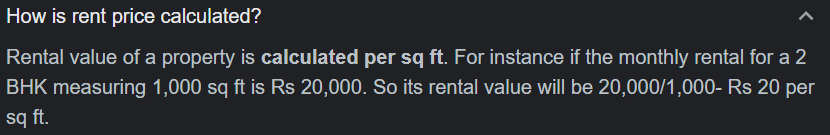

In [21]:
import PIL.Image as Image
Image.open('rentcalc.png')

In [22]:
df3[abs(df3['z_score'])>3].sample(10)

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,price_per_area,z_score
22426,OWNER,1,RK,Studio Apartment,Gokhalenagar,16000.0,250,Furnished,1,64.000000,6.238202
22265,OWNER,3,BHK,Apartment,Aundh,80000.0,1700,Furnished,3,47.058824,3.904391
3294,AGENT,2,BHK,Apartment,Kalyani Nagar,37000.0,890,Furnished,2,41.573034,3.148671
21774,OWNER,1,BHK,Apartment,Kothrud,12000.0,250,Furnished,1,48.000000,4.034047
16115,AGENT,2,BHK,Apartment,Koregaon Park,55000.0,1200,Furnished,2,45.833333,3.735568
17688,AGENT,2,BHK,Apartment,Koregaon Park,45000.0,1050,Furnished,2,42.857143,3.325569
11056,AGENT,1,RK,Studio Apartment,Koregaon Park Annexe,18000.0,350,Furnished,1,51.428571,4.506366
4121,AGENT,2,BHK,Apartment,Pimpri,45000.0,1100,Furnished,2,40.909091,3.057206
7921,AGENT,2,BHK,Apartment,Shivaji Nagar,50000.0,1200,Furnished,2,41.666667,3.161570
20474,OWNER,2,BHK,Apartment,Shivaji Nagar,60000.0,700,Furnished,1,85.714286,9.229555


In [23]:
#Dropping the records with price per sq.ft oustide 3 std
df4 = df3[(df3['z_score']<3)&(df3['z_score']>-3)]

In [24]:
df4.shape

(22618, 11)

In [25]:
df4['bathroom'].unique()

array(['1', '2', '3', '4', '5', 'East facing', 'NorthEast facing', '6',
       'Grfloor', 'North facing', 'West facing', '11 of 11floor', '8',
       '1 of 3floor', '1 of 2floor', 2, 1, 3, 4, 5], dtype=object)

In [26]:
df4[df4['bathroom']=='East facing']

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,price_per_area,z_score
516,OWNER,1,BHK,Independent House,Mundhwa,5500.0,500,Semi-Furnished,East facing,11.000000,-1.063060
529,OWNER,1,BHK,Independent House,Mundhwa,5500.0,500,Semi-Furnished,East facing,11.000000,-1.063060
3995,AGENT,1,BHK,Apartment,Baner,23000.0,1247,Semi-Furnished,East facing,18.444266,-0.037541
5680,AGENT,3,BHK,Apartment,Aundh,22500.0,1400,Unfurnished,East facing,16.071429,-0.364422
6955,AGENT,1,BHK,Apartment,NIBM Annexe,14000.0,640,Semi-Furnished,East facing,21.875000,0.435076
7007,AGENT,1,BHK,Apartment,NIBM Annexe,14000.0,640,Semi-Furnished,East facing,21.875000,0.435076
7059,AGENT,1,BHK,Apartment,Wakad,16000.0,640,Semi-Furnished,East facing,25.000000,0.865575
7100,AGENT,2,BHK,Apartment,Tathawade,23000.0,1470,Semi-Furnished,East facing,15.646259,-0.422993
7112,AGENT,2,BHK,Villa,Pimple Nilakh,22000.0,1090,Furnished,East facing,20.183486,0.202054
8660,AGENT,1,BHK,Apartment,Erandwane,13000.0,600,Unfurnished,East facing,21.666667,0.406376


In [27]:
df4['bedroom'].unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [28]:
df4['bathroom_fixed'] = df4['bedroom']

C:\Users\Abhishek\AppData\Local\Temp\ipykernel_41312\2500428986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['bathroom_fixed'] = df4['bedroom']


In [29]:
df4.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,bathroom,price_per_area,z_score,bathroom_fixed
0,OWNER,1,BHK,Independent Floor,Mundhwa,6750.0,450,Unfurnished,1,15.000000,-0.512021,1
1,OWNER,2,BHK,Apartment,Wakad,18000.0,916,Unfurnished,2,19.650655,0.128651,2
2,OWNER,3,BHK,Apartment,Wagholi,16500.0,1085,Semi-Furnished,3,15.207373,-0.483454,3
3,OWNER,1,RK,Studio Apartment,Kothrud,8000.0,250,Furnished,1,32.000000,1.829893,1
4,OWNER,2,BHK,Apartment,Yerawada,25000.0,1005,Semi-Furnished,2,24.875622,0.848441,2


In [30]:
df5=df4.drop(columns='bathroom')

In [31]:
df5.head()

,seller_type,bedroom,layout_type,property_type,locality,price,area,furnish_type,price_per_area,z_score,bathroom_fixed
0,OWNER,1,BHK,Independent Floor,Mundhwa,6750.0,450,Unfurnished,15.000000,-0.512021,1
1,OWNER,2,BHK,Apartment,Wakad,18000.0,916,Unfurnished,19.650655,0.128651,2
2,OWNER,3,BHK,Apartment,Wagholi,16500.0,1085,Semi-Furnished,15.207373,-0.483454,3
3,OWNER,1,RK,Studio Apartment,Kothrud,8000.0,250,Furnished,32.000000,1.829893,1
4,OWNER,2,BHK,Apartment,Yerawada,25000.0,1005,Semi-Furnished,24.875622,0.848441,2


In [32]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22618 entries, 0 to 22761
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seller_type     22618 non-null  object 
 1   bedroom         22618 non-null  int64  
 2   layout_type     22618 non-null  object 
 3   property_type   22618 non-null  object 
 4   locality        22618 non-null  object 
 5   price           22618 non-null  float64
 6   area            22618 non-null  int64  
 7   furnish_type    22618 non-null  object 
 8   price_per_area  22618 non-null  float64
 9   z_score         22618 non-null  float64
 10  bathroom_fixed  22618 non-null  int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 2.1+ MB


In [33]:
for i in ['seller_type','layout_type','property_type','furnish_type']:
    if (df4[i].dtypes == 'object'):
        print(i,df4[i].unique(),df4[i].nunique())

seller_type ['OWNER' 'AGENT' 'BUILDER'] 3
layout_type ['BHK' 'RK'] 2
property_type ['Independent Floor' 'Apartment' 'Studio Apartment' 'Villa'
 'Independent House' 'Penthouse'] 6
furnish_type ['Unfurnished' 'Semi-Furnished' 'Furnished'] 3


In [34]:
seller_dummies = pd.get_dummies(df4['seller_type']).drop(columns='BUILDER')

In [35]:
layout_type_dummies=pd.get_dummies(df4['layout_type']).drop(columns='RK')

In [36]:
property_type_dummies = pd.get_dummies(df4['property_type']).drop(columns=['Penthouse'])

In [37]:
furnish_type_dummies=pd.get_dummies(df4['furnish_type']).drop(columns='Semi-Furnished')

In [38]:
pd.set_option('display.max_rows',None)

In [39]:
df4['locality'].nunique()

452

In [40]:
top_locality = df4['locality'].value_counts().sort_values(ascending=False)[:200].index

In [41]:
top_locality

Index(['Wagholi', 'Hinjewadi', 'Wakad', 'Kharadi', 'Hadapsar', 'Bavdhan',
       'Baner', 'Pimple Saudagar', 'Wadgaon Sheri', 'Kothrud',
       ...
       'Hinjewadi Phase 1', 'Saswad', 'Shastri Nagar', 'Karve Road Kothrud',
       'Kolhewadi', 'Uttam Nagar', 'Anand Tirth Nagar', 'Raviwar Peth', 'Nere',
       'Dhankawadi'],
      dtype='object', length=200)

In [42]:
df5 = df4.copy()

In [43]:
df5['locality']=np.where(df4['locality'].isin(top_locality), df4['locality'],'other')

In [44]:
df5['locality'].nunique()

201

In [45]:
pd.set_option('display.max_columns',None)

In [46]:
locality_dummies = pd.get_dummies(df5['locality'])

In [47]:
df6 = pd.concat([seller_dummies,layout_type_dummies],axis='columns')

In [48]:
df6 = pd.concat([df6,property_type_dummies],axis='columns')

In [49]:
df6 = pd.concat([df6,furnish_type_dummies],axis='columns')

In [50]:
df6 = pd.concat([df6,locality_dummies],axis='columns')

In [51]:
df6.head()

,AGENT,OWNER,BHK,Apartment,Independent Floor,Independent House,Studio Apartment,Villa,Furnished,Unfurnished,Agalambe,Akurdi,Alandi,Ambegaon 1,Ambegaon Budruk,Ambegaon Pathar,Anand Nagar,Anand Tirth Nagar,Ashok Nagar,Aundh,Awhalwadi,BT Kawde,Balaji Nagar,Balewadi,Baner,Baner Road,Bavdhan,Bhairav Nagar,Bhandarkar Road,Bharati Vidyapeeth Campus,Bhawani Peth,Bhegade Aali,Bhosari,Bhugaon,Bhukum,Bibwewadi,Bibwewadi Kondhwa Road,Boat Club Road,Bopkhel,Bopodi,Chakan,Chandan Nagar,Charholi Budruk,Chikhali,Chinchwad,Chinchwad Gaon,Dapodi,Dattavadi,Daund,Deccan Gymkhana,Dehu Road Cantonment,Dhanakwadi,Dhankawadi,Dhankawadi Police Station Road,Dhankawadi Road,Dhanori,Dhayari,Dhayari Phata,Dhaygude Wada,Dighi,Erandwane,Fatima Nagar,Fursungi,Gahunje,Ganesh Nagar,Ganesh Peth,Ganj Peth,Ghorpadi,Gokhalenagar,Gulab Nagar Pune,Gultekdi,Guruwar Peth,Hadapsar,Handewadi,Hinjewadi,Hinjewadi Phase 1,Jambhe,Jambhul,Jambhulwadi,Kalewadi,Kalewadi Pandhapur Road,Kalyani Nagar,Karve Nagar,Karve Road Kothrud,Kasarwadi,Kasba Peth,Katraj,Kausar Baugh,Keshav Nagar,Khadki,Kharadi,Kolhewadi,Kondhwa,Kondhwa Budruk,Koregaon Park,Kothrud,Kothrud Depot Road,Law College Road,Lohegaon,Loni Kalbhor,Lonikand,Lulla Nagar,MAE Campus,Maan,Magarpatta,Mahalunge,Mamurdi,Manjari,Manjari Budruk,Manjari Khurd,Market yard,Marunji,Mohammed wadi,Mohan Nagar,Moshi,Mukund Nagar,Mundhwa,Munjaba Vasti,NIBM,NIBM Annex Mohammadwadi,NIBM Annexe,Nanded,Narayan Peth,Narhe,Nere,New Kalyani Nagar,New Sangavi,Nigdi,Nigdi Sector 24,Old Sanghvi,Old Sangvi,Parvati Darshan,Pashan,Paud Road,Perugate,Pimple Gurav,Pimple Nilakh,Pimple Saudagar,Pimpri,Pimpri Chinchwad,Pirangut,Pisoli,Pradhikaran Nigdi,Punawale,Pune Satara Road,Pune Solapur Road,Pune Station,Rahatani,Rambaug Colony,Rasta Peth,Ravet,Raviwar Peth,Sadashiv Peth,Sahakar Nagar,Sainath Nagar,Salisbury Park,Salunke Vihar,Sanaswadi,Sangamvadi,Sasane Nagar,Saswad,Senapati Bapat Road,Shaniwar Peth,Shastri Nagar,Shewalewadi,Shikrapur,Shirgaon,Shivaji Nagar,Shivane,Shivtirth Nagar,Shukrawar Peth,Sinhgad Road,Somwar Peth,Sopan Baug,Sukhsagar Nagar,Sunarwadi,Sus,Swargate,Talegaon Dabhade,Talwade,Tathawade,Teen Hatti Chowk Road,Thergaon,Tingre Nagar,Tulaja Bhawani Nagar,Undri,Uttam Nagar,Vadgaon Budruk,Vadgoan Sheri Rajendri Nagar,Vanaz corner,Vikas Nagar,Viman Nagar,Vishrantwadi,Wadgaon Sheri,Wagholi,Wakad,Walvekar Nagar,Wanowrie,Wanwadi,Warje,Warje Malwadi,Yamuna Nagar,Yerawada,Yewalewadi,aranyeshwar,bhusari colony,hingne Khurd,katraj kondhwa road,kesnand,maharshi nagar,other
0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [52]:
df6.shape

(22618, 211)

In [53]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22618 entries, 0 to 22761
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seller_type     22618 non-null  object 
 1   bedroom         22618 non-null  int64  
 2   layout_type     22618 non-null  object 
 3   property_type   22618 non-null  object 
 4   locality        22618 non-null  object 
 5   price           22618 non-null  float64
 6   area            22618 non-null  int64  
 7   furnish_type    22618 non-null  object 
 8   bathroom        22618 non-null  object 
 9   price_per_area  22618 non-null  float64
 10  z_score         22618 non-null  float64
 11  bathroom_fixed  22618 non-null  int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 2.2+ MB


In [54]:
df7 = pd.concat([df5[['bedroom','bathroom','area','price']],df6],axis='columns')

In [55]:
df7.head()

,bedroom,bathroom,area,price,AGENT,OWNER,BHK,Apartment,Independent Floor,Independent House,Studio Apartment,Villa,Furnished,Unfurnished,Agalambe,Akurdi,Alandi,Ambegaon 1,Ambegaon Budruk,Ambegaon Pathar,Anand Nagar,Anand Tirth Nagar,Ashok Nagar,Aundh,Awhalwadi,BT Kawde,Balaji Nagar,Balewadi,Baner,Baner Road,Bavdhan,Bhairav Nagar,Bhandarkar Road,Bharati Vidyapeeth Campus,Bhawani Peth,Bhegade Aali,Bhosari,Bhugaon,Bhukum,Bibwewadi,Bibwewadi Kondhwa Road,Boat Club Road,Bopkhel,Bopodi,Chakan,Chandan Nagar,Charholi Budruk,Chikhali,Chinchwad,Chinchwad Gaon,Dapodi,Dattavadi,Daund,Deccan Gymkhana,Dehu Road Cantonment,Dhanakwadi,Dhankawadi,Dhankawadi Police Station Road,Dhankawadi Road,Dhanori,Dhayari,Dhayari Phata,Dhaygude Wada,Dighi,Erandwane,Fatima Nagar,Fursungi,Gahunje,Ganesh Nagar,Ganesh Peth,Ganj Peth,Ghorpadi,Gokhalenagar,Gulab Nagar Pune,Gultekdi,Guruwar Peth,Hadapsar,Handewadi,Hinjewadi,Hinjewadi Phase 1,Jambhe,Jambhul,Jambhulwadi,Kalewadi,Kalewadi Pandhapur Road,Kalyani Nagar,Karve Nagar,Karve Road Kothrud,Kasarwadi,Kasba Peth,Katraj,Kausar Baugh,Keshav Nagar,Khadki,Kharadi,Kolhewadi,Kondhwa,Kondhwa Budruk,Koregaon Park,Kothrud,Kothrud Depot Road,Law College Road,Lohegaon,Loni Kalbhor,Lonikand,Lulla Nagar,MAE Campus,Maan,Magarpatta,Mahalunge,Mamurdi,Manjari,Manjari Budruk,Manjari Khurd,Market yard,Marunji,Mohammed wadi,Mohan Nagar,Moshi,Mukund Nagar,Mundhwa,Munjaba Vasti,NIBM,NIBM Annex Mohammadwadi,NIBM Annexe,Nanded,Narayan Peth,Narhe,Nere,New Kalyani Nagar,New Sangavi,Nigdi,Nigdi Sector 24,Old Sanghvi,Old Sangvi,Parvati Darshan,Pashan,Paud Road,Perugate,Pimple Gurav,Pimple Nilakh,Pimple Saudagar,Pimpri,Pimpri Chinchwad,Pirangut,Pisoli,Pradhikaran Nigdi,Punawale,Pune Satara Road,Pune Solapur Road,Pune Station,Rahatani,Rambaug Colony,Rasta Peth,Ravet,Raviwar Peth,Sadashiv Peth,Sahakar Nagar,Sainath Nagar,Salisbury Park,Salunke Vihar,Sanaswadi,Sangamvadi,Sasane Nagar,Saswad,Senapati Bapat Road,Shaniwar Peth,Shastri Nagar,Shewalewadi,Shikrapur,Shirgaon,Shivaji Nagar,Shivane,Shivtirth Nagar,Shukrawar Peth,Sinhgad Road,Somwar Peth,Sopan Baug,Sukhsagar Nagar,Sunarwadi,Sus,Swargate,Talegaon Dabhade,Talwade,Tathawade,Teen Hatti Chowk Road,Thergaon,Tingre Nagar,Tulaja Bhawani Nagar,Undri,Uttam Nagar,Vadgaon Budruk,Vadgoan Sheri Rajendri Nagar,Vanaz corner,Vikas Nagar,Viman Nagar,Vishrantwadi,Wadgaon Sheri,Wagholi,Wakad,Walvekar Nagar,Wanowrie,Wanwadi,Warje,Warje Malwadi,Yamuna Nagar,Yerawada,Yewalewadi,aranyeshwar,bhusari colony,hingne Khurd,katraj kondhwa road,kesnand,maharshi nagar,other
0,1,1,450,6750.0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,2,916,18000.0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,3,1085,16500.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,250,8000.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [56]:
df7.describe()

,bedroom,area,price,AGENT,OWNER,BHK,Apartment,Independent Floor,Independent House,Studio Apartment,Villa,Furnished,Unfurnished,Agalambe,Akurdi,Alandi,Ambegaon 1,Ambegaon Budruk,Ambegaon Pathar,Anand Nagar,Anand Tirth Nagar,Ashok Nagar,Aundh,Awhalwadi,BT Kawde,Balaji Nagar,Balewadi,Baner,Baner Road,Bavdhan,Bhairav Nagar,Bhandarkar Road,Bharati Vidyapeeth Campus,Bhawani Peth,Bhegade Aali,Bhosari,Bhugaon,Bhukum,Bibwewadi,Bibwewadi Kondhwa Road,Boat Club Road,Bopkhel,Bopodi,Chakan,Chandan Nagar,Charholi Budruk,Chikhali,Chinchwad,Chinchwad Gaon,Dapodi,Dattavadi,Daund,Deccan Gymkhana,Dehu Road Cantonment,Dhanakwadi,Dhankawadi,Dhankawadi Police Station Road,Dhankawadi Road,Dhanori,Dhayari,Dhayari Phata,Dhaygude Wada,Dighi,Erandwane,Fatima Nagar,Fursungi,Gahunje,Ganesh Nagar,Ganesh Peth,Ganj Peth,Ghorpadi,Gokhalenagar,Gulab Nagar Pune,Gultekdi,Guruwar Peth,Hadapsar,Handewadi,Hinjewadi,Hinjewadi Phase 1,Jambhe,Jambhul,Jambhulwadi,Kalewadi,Kalewadi Pandhapur Road,Kalyani Nagar,Karve Nagar,Karve Road Kothrud,Kasarwadi,Kasba Peth,Katraj,Kausar Baugh,Keshav Nagar,Khadki,Kharadi,Kolhewadi,Kondhwa,Kondhwa Budruk,Koregaon Park,Kothrud,Kothrud Depot Road,Law College Road,Lohegaon,Loni Kalbhor,Lonikand,Lulla Nagar,MAE Campus,Maan,Magarpatta,Mahalunge,Mamurdi,Manjari,Manjari Budruk,Manjari Khurd,Market yard,Marunji,Mohammed wadi,Mohan Nagar,Moshi,Mukund Nagar,Mundhwa,Munjaba Vasti,NIBM,NIBM Annex Mohammadwadi,NIBM Annexe,Nanded,Narayan Peth,Narhe,Nere,New Kalyani Nagar,New Sangavi,Nigdi,Nigdi Sector 24,Old Sanghvi,Old Sangvi,Parvati Darshan,Pashan,Paud Road,Perugate,Pimple Gurav,Pimple Nilakh,Pimple Saudagar,Pimpri,Pimpri Chinchwad,Pirangut,Pisoli,Pradhikaran Nigdi,Punawale,Pune Satara Road,Pune Solapur Road,Pune Station,Rahatani,Rambaug Colony,Rasta Peth,Ravet,Raviwar Peth,Sadashiv Peth,Sahakar Nagar,Sainath Nagar,Salisbury Park,Salunke Vihar,Sanaswadi,Sangamvadi,Sasane Nagar,Saswad,Senapati Bapat Road,Shaniwar Peth,Shastri Nagar,Shewalewadi,Shikrapur,Shirgaon,Shivaji Nagar,Shivane,Shivtirth Nagar,Shukrawar Peth,Sinhgad Road,Somwar Peth,Sopan Baug,Sukhsagar Nagar,Sunarwadi,Sus,Swargate,Talegaon Dabhade,Talwade,Tathawade,Teen Hatti Chowk Road,Thergaon,Tingre Nagar,Tulaja Bhawani Nagar,Undri,Uttam Nagar,Vadgaon Budruk,Vadgoan Sheri Rajendri Nagar,Vanaz corner,Vikas Nagar,Viman Nagar,Vishrantwadi,Wadgaon Sheri,Wagholi,Wakad,Walvekar Nagar,Wanowrie,Wanwadi,Warje,Warje Malwadi,Yamuna Nagar,Yerawada,Yewalewadi,aranyeshwar,bhusari colony,hingne Khurd,katraj kondhwa road,kesnand,maharshi nagar,other
count,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.000000,22618.

In the above df we can observe that price has value 1.....this needs to be fixed...as 
Rs.1 cannot be a valid price

In [57]:
print(df7.shape)
df7[df7['price']==1].sample(5)

(22618, 215)


,bedroom,bathroom,area,price,AGENT,OWNER,BHK,Apartment,Independent Floor,Independent House,Studio Apartment,Villa,Furnished,Unfurnished,Agalambe,Akurdi,Alandi,Ambegaon 1,Ambegaon Budruk,Ambegaon Pathar,Anand Nagar,Anand Tirth Nagar,Ashok Nagar,Aundh,Awhalwadi,BT Kawde,Balaji Nagar,Balewadi,Baner,Baner Road,Bavdhan,Bhairav Nagar,Bhandarkar Road,Bharati Vidyapeeth Campus,Bhawani Peth,Bhegade Aali,Bhosari,Bhugaon,Bhukum,Bibwewadi,Bibwewadi Kondhwa Road,Boat Club Road,Bopkhel,Bopodi,Chakan,Chandan Nagar,Charholi Budruk,Chikhali,Chinchwad,Chinchwad Gaon,Dapodi,Dattavadi,Daund,Deccan Gymkhana,Dehu Road Cantonment,Dhanakwadi,Dhankawadi,Dhankawadi Police Station Road,Dhankawadi Road,Dhanori,Dhayari,Dhayari Phata,Dhaygude Wada,Dighi,Erandwane,Fatima Nagar,Fursungi,Gahunje,Ganesh Nagar,Ganesh Peth,Ganj Peth,Ghorpadi,Gokhalenagar,Gulab Nagar Pune,Gultekdi,Guruwar Peth,Hadapsar,Handewadi,Hinjewadi,Hinjewadi Phase 1,Jambhe,Jambhul,Jambhulwadi,Kalewadi,Kalewadi Pandhapur Road,Kalyani Nagar,Karve Nagar,Karve Road Kothrud,Kasarwadi,Kasba Peth,Katraj,Kausar Baugh,Keshav Nagar,Khadki,Kharadi,Kolhewadi,Kondhwa,Kondhwa Budruk,Koregaon Park,Kothrud,Kothrud Depot Road,Law College Road,Lohegaon,Loni Kalbhor,Lonikand,Lulla Nagar,MAE Campus,Maan,Magarpatta,Mahalunge,Mamurdi,Manjari,Manjari Budruk,Manjari Khurd,Market yard,Marunji,Mohammed wadi,Mohan Nagar,Moshi,Mukund Nagar,Mundhwa,Munjaba Vasti,NIBM,NIBM Annex Mohammadwadi,NIBM Annexe,Nanded,Narayan Peth,Narhe,Nere,New Kalyani Nagar,New Sangavi,Nigdi,Nigdi Sector 24,Old Sanghvi,Old Sangvi,Parvati Darshan,Pashan,Paud Road,Perugate,Pimple Gurav,Pimple Nilakh,Pimple Saudagar,Pimpri,Pimpri Chinchwad,Pirangut,Pisoli,Pradhikaran Nigdi,Punawale,Pune Satara Road,Pune Solapur Road,Pune Station,Rahatani,Rambaug Colony,Rasta Peth,Ravet,Raviwar Peth,Sadashiv Peth,Sahakar Nagar,Sainath Nagar,Salisbury Park,Salunke Vihar,Sanaswadi,Sangamvadi,Sasane Nagar,Saswad,Senapati Bapat Road,Shaniwar Peth,Shastri Nagar,Shewalewadi,Shikrapur,Shirgaon,Shivaji Nagar,Shivane,Shivtirth Nagar,Shukrawar Peth,Sinhgad Road,Somwar Peth,Sopan Baug,Sukhsagar Nagar,Sunarwadi,Sus,Swargate,Talegaon Dabhade,Talwade,Tathawade,Teen Hatti Chowk Road,Thergaon,Tingre Nagar,Tulaja Bhawani Nagar,Undri,Uttam Nagar,Vadgaon Budruk,Vadgoan Sheri Rajendri Nagar,Vanaz corner,Vikas Nagar,Viman Nagar,Vishrantwadi,Wadgaon Sheri,Wagholi,Wakad,Walvekar Nagar,Wanowrie,Wanwadi,Warje,Warje Malwadi,Yamuna Nagar,Yerawada,Yewalewadi,aranyeshwar,bhusari colony,hingne Khurd,katraj kondhwa road,kesnand,maharshi nagar,other
17392,4,4,3200,1.0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19357,3,3,2125,1.0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16090,3,3,2500,1.0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6989,4,4,3829,1.0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [58]:
df8=df7.copy()

In [59]:
df8['price_per_area'] = df7['price']/df7['area']

In [60]:
df8.head()

,bedroom,bathroom,area,price,AGENT,OWNER,BHK,Apartment,Independent Floor,Independent House,Studio Apartment,Villa,Furnished,Unfurnished,Agalambe,Akurdi,Alandi,Ambegaon 1,Ambegaon Budruk,Ambegaon Pathar,Anand Nagar,Anand Tirth Nagar,Ashok Nagar,Aundh,Awhalwadi,BT Kawde,Balaji Nagar,Balewadi,Baner,Baner Road,Bavdhan,Bhairav Nagar,Bhandarkar Road,Bharati Vidyapeeth Campus,Bhawani Peth,Bhegade Aali,Bhosari,Bhugaon,Bhukum,Bibwewadi,Bibwewadi Kondhwa Road,Boat Club Road,Bopkhel,Bopodi,Chakan,Chandan Nagar,Charholi Budruk,Chikhali,Chinchwad,Chinchwad Gaon,Dapodi,Dattavadi,Daund,Deccan Gymkhana,Dehu Road Cantonment,Dhanakwadi,Dhankawadi,Dhankawadi Police Station Road,Dhankawadi Road,Dhanori,Dhayari,Dhayari Phata,Dhaygude Wada,Dighi,Erandwane,Fatima Nagar,Fursungi,Gahunje,Ganesh Nagar,Ganesh Peth,Ganj Peth,Ghorpadi,Gokhalenagar,Gulab Nagar Pune,Gultekdi,Guruwar Peth,Hadapsar,Handewadi,Hinjewadi,Hinjewadi Phase 1,Jambhe,Jambhul,Jambhulwadi,Kalewadi,Kalewadi Pandhapur Road,Kalyani Nagar,Karve Nagar,Karve Road Kothrud,Kasarwadi,Kasba Peth,Katraj,Kausar Baugh,Keshav Nagar,Khadki,Kharadi,Kolhewadi,Kondhwa,Kondhwa Budruk,Koregaon Park,Kothrud,Kothrud Depot Road,Law College Road,Lohegaon,Loni Kalbhor,Lonikand,Lulla Nagar,MAE Campus,Maan,Magarpatta,Mahalunge,Mamurdi,Manjari,Manjari Budruk,Manjari Khurd,Market yard,Marunji,Mohammed wadi,Mohan Nagar,Moshi,Mukund Nagar,Mundhwa,Munjaba Vasti,NIBM,NIBM Annex Mohammadwadi,NIBM Annexe,Nanded,Narayan Peth,Narhe,Nere,New Kalyani Nagar,New Sangavi,Nigdi,Nigdi Sector 24,Old Sanghvi,Old Sangvi,Parvati Darshan,Pashan,Paud Road,Perugate,Pimple Gurav,Pimple Nilakh,Pimple Saudagar,Pimpri,Pimpri Chinchwad,Pirangut,Pisoli,Pradhikaran Nigdi,Punawale,Pune Satara Road,Pune Solapur Road,Pune Station,Rahatani,Rambaug Colony,Rasta Peth,Ravet,Raviwar Peth,Sadashiv Peth,Sahakar Nagar,Sainath Nagar,Salisbury Park,Salunke Vihar,Sanaswadi,Sangamvadi,Sasane Nagar,Saswad,Senapati Bapat Road,Shaniwar Peth,Shastri Nagar,Shewalewadi,Shikrapur,Shirgaon,Shivaji Nagar,Shivane,Shivtirth Nagar,Shukrawar Peth,Sinhgad Road,Somwar Peth,Sopan Baug,Sukhsagar Nagar,Sunarwadi,Sus,Swargate,Talegaon Dabhade,Talwade,Tathawade,Teen Hatti Chowk Road,Thergaon,Tingre Nagar,Tulaja Bhawani Nagar,Undri,Uttam Nagar,Vadgaon Budruk,Vadgoan Sheri Rajendri Nagar,Vanaz corner,Vikas Nagar,Viman Nagar,Vishrantwadi,Wadgaon Sheri,Wagholi,Wakad,Walvekar Nagar,Wanowrie,Wanwadi,Warje,Warje Malwadi,Yamuna Nagar,Yerawada,Yewalewadi,aranyeshwar,bhusari colony,hingne Khurd,katraj kondhwa road,kesnand,maharshi nagar,other,price_per_area
0,1,1,450,6750.0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.000000
1,2,2,916,18000.0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19.650655
2,3,3,1085,16500.0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15.207373
3,1,1,250,8000.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [61]:
df9=df8[df8['price_per_area']>10]

In [62]:
df9['price_per_area'].describe()

count    21465.000000
mean        19.057961
std          5.330011
min         10.004002
25%         15.063168
50%         18.333333
75%         22.000000
max         40.454545
Name: price_per_area, dtype: float64

In [63]:
df10 = df9.drop(columns=['price_per_area'])

In [64]:
df10.shape

(21465, 215)

In [65]:
df10.describe()

,bedroom,area,price,AGENT,OWNER,BHK,Apartment,Independent Floor,Independent House,Studio Apartment,Villa,Furnished,Unfurnished,Agalambe,Akurdi,Alandi,Ambegaon 1,Ambegaon Budruk,Ambegaon Pathar,Anand Nagar,Anand Tirth Nagar,Ashok Nagar,Aundh,Awhalwadi,BT Kawde,Balaji Nagar,Balewadi,Baner,Baner Road,Bavdhan,Bhairav Nagar,Bhandarkar Road,Bharati Vidyapeeth Campus,Bhawani Peth,Bhegade Aali,Bhosari,Bhugaon,Bhukum,Bibwewadi,Bibwewadi Kondhwa Road,Boat Club Road,Bopkhel,Bopodi,Chakan,Chandan Nagar,Charholi Budruk,Chikhali,Chinchwad,Chinchwad Gaon,Dapodi,Dattavadi,Daund,Deccan Gymkhana,Dehu Road Cantonment,Dhanakwadi,Dhankawadi,Dhankawadi Police Station Road,Dhankawadi Road,Dhanori,Dhayari,Dhayari Phata,Dhaygude Wada,Dighi,Erandwane,Fatima Nagar,Fursungi,Gahunje,Ganesh Nagar,Ganesh Peth,Ganj Peth,Ghorpadi,Gokhalenagar,Gulab Nagar Pune,Gultekdi,Guruwar Peth,Hadapsar,Handewadi,Hinjewadi,Hinjewadi Phase 1,Jambhe,Jambhul,Jambhulwadi,Kalewadi,Kalewadi Pandhapur Road,Kalyani Nagar,Karve Nagar,Karve Road Kothrud,Kasarwadi,Kasba Peth,Katraj,Kausar Baugh,Keshav Nagar,Khadki,Kharadi,Kolhewadi,Kondhwa,Kondhwa Budruk,Koregaon Park,Kothrud,Kothrud Depot Road,Law College Road,Lohegaon,Loni Kalbhor,Lonikand,Lulla Nagar,MAE Campus,Maan,Magarpatta,Mahalunge,Mamurdi,Manjari,Manjari Budruk,Manjari Khurd,Market yard,Marunji,Mohammed wadi,Mohan Nagar,Moshi,Mukund Nagar,Mundhwa,Munjaba Vasti,NIBM,NIBM Annex Mohammadwadi,NIBM Annexe,Nanded,Narayan Peth,Narhe,Nere,New Kalyani Nagar,New Sangavi,Nigdi,Nigdi Sector 24,Old Sanghvi,Old Sangvi,Parvati Darshan,Pashan,Paud Road,Perugate,Pimple Gurav,Pimple Nilakh,Pimple Saudagar,Pimpri,Pimpri Chinchwad,Pirangut,Pisoli,Pradhikaran Nigdi,Punawale,Pune Satara Road,Pune Solapur Road,Pune Station,Rahatani,Rambaug Colony,Rasta Peth,Ravet,Raviwar Peth,Sadashiv Peth,Sahakar Nagar,Sainath Nagar,Salisbury Park,Salunke Vihar,Sanaswadi,Sangamvadi,Sasane Nagar,Saswad,Senapati Bapat Road,Shaniwar Peth,Shastri Nagar,Shewalewadi,Shikrapur,Shirgaon,Shivaji Nagar,Shivane,Shivtirth Nagar,Shukrawar Peth,Sinhgad Road,Somwar Peth,Sopan Baug,Sukhsagar Nagar,Sunarwadi,Sus,Swargate,Talegaon Dabhade,Talwade,Tathawade,Teen Hatti Chowk Road,Thergaon,Tingre Nagar,Tulaja Bhawani Nagar,Undri,Uttam Nagar,Vadgaon Budruk,Vadgoan Sheri Rajendri Nagar,Vanaz corner,Vikas Nagar,Viman Nagar,Vishrantwadi,Wadgaon Sheri,Wagholi,Wakad,Walvekar Nagar,Wanowrie,Wanwadi,Warje,Warje Malwadi,Yamuna Nagar,Yerawada,Yewalewadi,aranyeshwar,bhusari colony,hingne Khurd,katraj kondhwa road,kesnand,maharshi nagar,other
count,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.00000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.00000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.000000,21465.00

In [66]:
df10.shape

(21465, 215)

In [67]:
import seaborn as sns
plt.rcParams['figure.figsize']=(15,7)

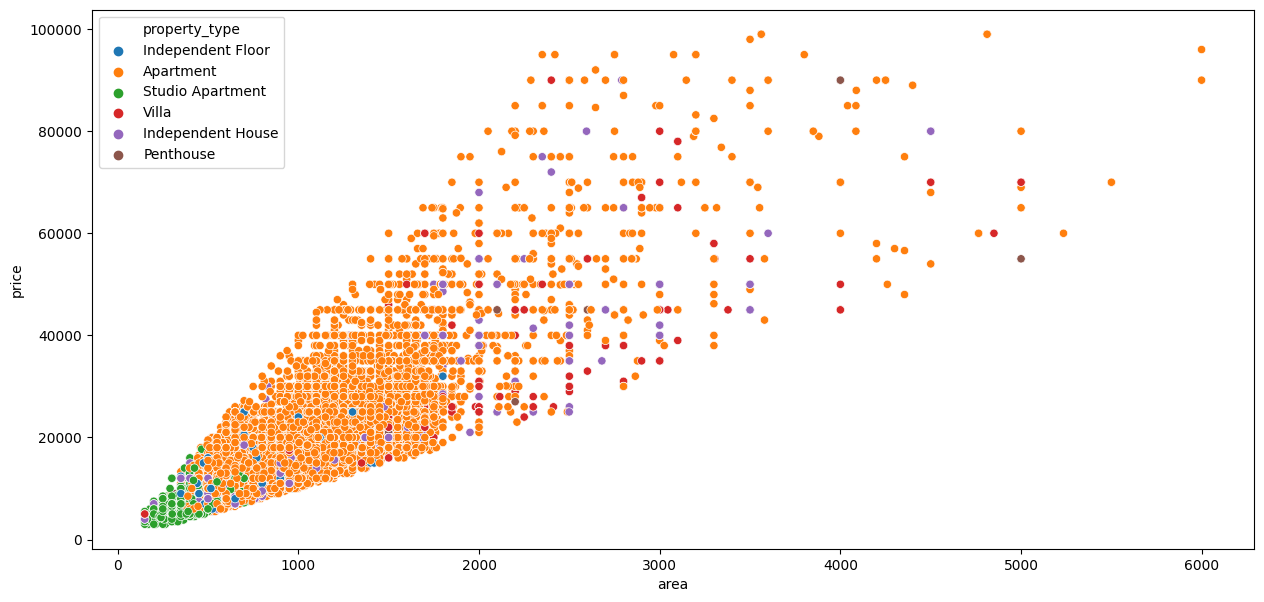

In [68]:
#Price W.R.T Property type
sns.scatterplot(x=df10['area'],y=df10['price'],hue=df['property_type'])
plt.show()

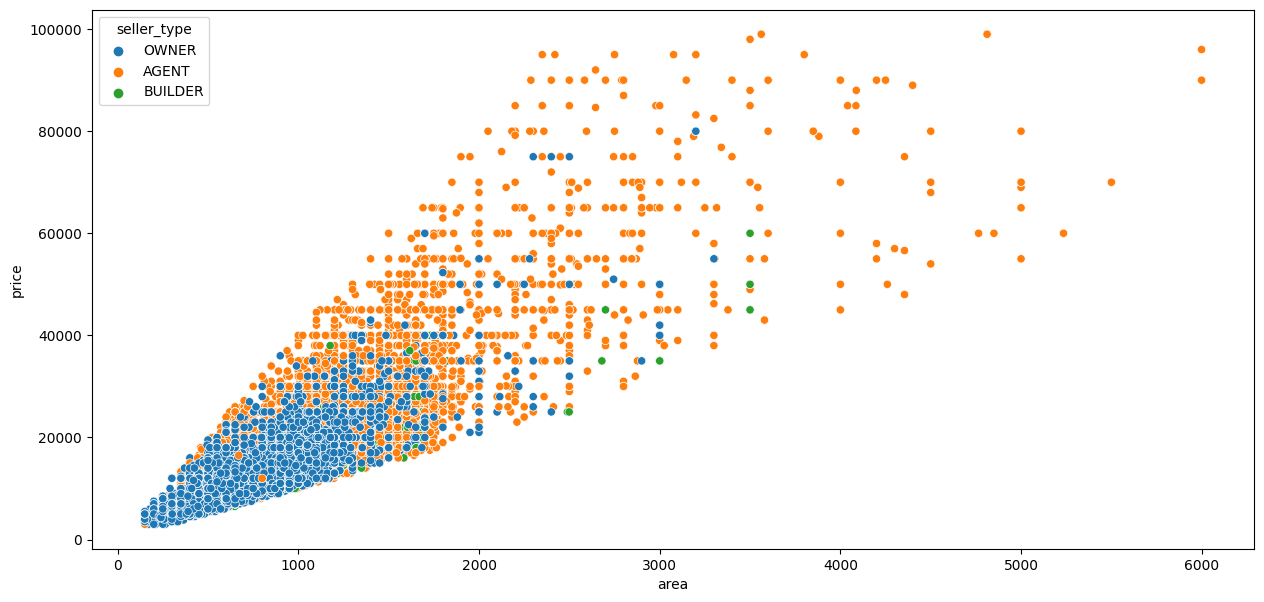

In [69]:
#price w.r.t Seller type
sns.scatterplot(x=df10['area'],y=df10['price'],hue=df['seller_type'])
plt.show()

<AxesSubplot: ylabel='Frequency'>

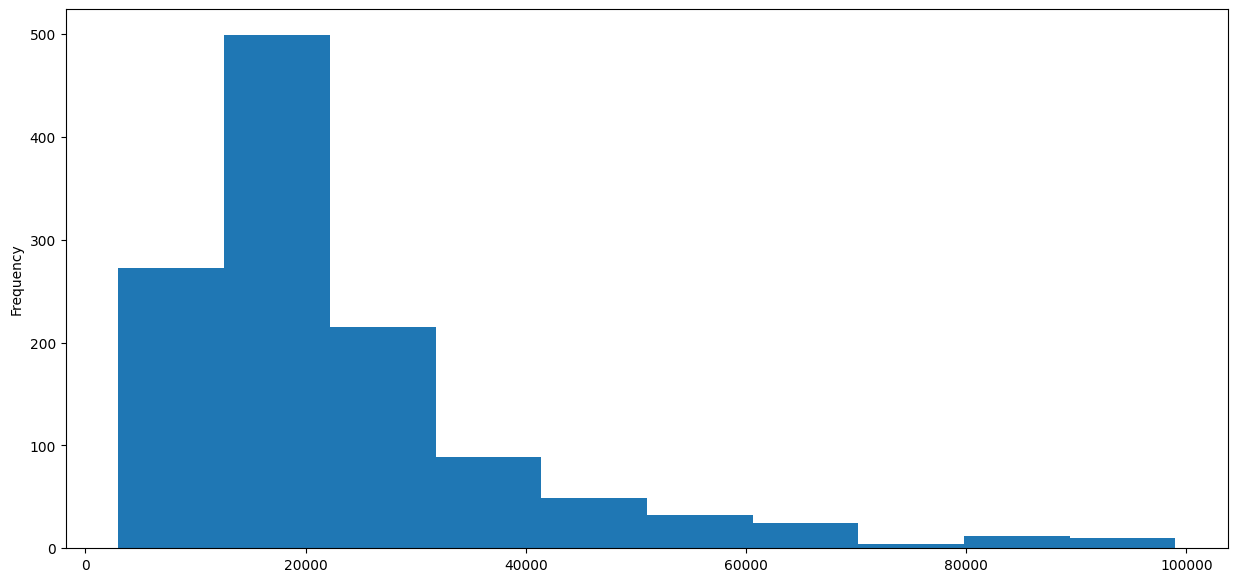

In [70]:
df10.groupby('area')['price'].median().plot(kind='hist')

Data Distribution is Right Skewed

Standarad scalar wont work here so.... using minmax norm 

In [71]:
df11 = df10.copy()

In [72]:
df11['bathroom_fixed'] = df11['bedroom']

In [73]:
df11.drop(columns='bathroom', inplace=True)

In [74]:
df11.shape

(21465, 215)

In [75]:
X = df11.drop(columns='price')
y = df11['price']

In [76]:
X.shape,y.shape

((21465, 214), (21465,))

In [77]:
df10['bathroom'].unique()

array(['1', '2', '3', '4', 'East facing', 'NorthEast facing', '5',
       'Grfloor', 'North facing', 'West facing', '6', '11 of 11floor',
       '1 of 3floor', '1 of 2floor', 2, 1, 3, 4, 5], dtype=object)

In [78]:
df10['bedroom'].unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [79]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

In [80]:
sc =  MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [81]:
#Linear model
model_linear = LinearRegression()
model_linear.fit(X_train_scaled,y_train)
model_linear.score(X_test_scaled,y_test)

0.8336355469611044

In [82]:
#Decission Tree Regressor
model_DTR = DecisionTreeRegressor(criterion='poisson')
model_DTR.fit(X_train_scaled,y_train)
model_DTR.score(X_test_scaled,y_test)

0.8552047301190697

In [83]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

ada = AdaBoostRegressor(estimator=DecisionTreeRegressor(),n_estimators=100,learning_rate=1)
ada.fit(X_train_scaled,y_train)
ada.score(X_test_scaled,y_test)

0.8451871040575828

In [84]:
RFR = RandomForestRegressor(n_estimators=300)
RFR.fit(X_train_scaled,y_train)
RFR.score(X_test_scaled,y_test)

0.8821769847103152

In [85]:
RFR = RandomForestRegressor(criterion='poisson',n_estimators=300)
RFR.fit(X_train_scaled,y_train)
RFR.score(X_test_scaled,y_test)

0.8821177639676293

In [86]:
df11.head(1)

,bedroom,area,price,AGENT,OWNER,BHK,Apartment,Independent Floor,Independent House,Studio Apartment,Villa,Furnished,Unfurnished,Agalambe,Akurdi,Alandi,Ambegaon 1,Ambegaon Budruk,Ambegaon Pathar,Anand Nagar,Anand Tirth Nagar,Ashok Nagar,Aundh,Awhalwadi,BT Kawde,Balaji Nagar,Balewadi,Baner,Baner Road,Bavdhan,Bhairav Nagar,Bhandarkar Road,Bharati Vidyapeeth Campus,Bhawani Peth,Bhegade Aali,Bhosari,Bhugaon,Bhukum,Bibwewadi,Bibwewadi Kondhwa Road,Boat Club Road,Bopkhel,Bopodi,Chakan,Chandan Nagar,Charholi Budruk,Chikhali,Chinchwad,Chinchwad Gaon,Dapodi,Dattavadi,Daund,Deccan Gymkhana,Dehu Road Cantonment,Dhanakwadi,Dhankawadi,Dhankawadi Police Station Road,Dhankawadi Road,Dhanori,Dhayari,Dhayari Phata,Dhaygude Wada,Dighi,Erandwane,Fatima Nagar,Fursungi,Gahunje,Ganesh Nagar,Ganesh Peth,Ganj Peth,Ghorpadi,Gokhalenagar,Gulab Nagar Pune,Gultekdi,Guruwar Peth,Hadapsar,Handewadi,Hinjewadi,Hinjewadi Phase 1,Jambhe,Jambhul,Jambhulwadi,Kalewadi,Kalewadi Pandhapur Road,Kalyani Nagar,Karve Nagar,Karve Road Kothrud,Kasarwadi,Kasba Peth,Katraj,Kausar Baugh,Keshav Nagar,Khadki,Kharadi,Kolhewadi,Kondhwa,Kondhwa Budruk,Koregaon Park,Kothrud,Kothrud Depot Road,Law College Road,Lohegaon,Loni Kalbhor,Lonikand,Lulla Nagar,MAE Campus,Maan,Magarpatta,Mahalunge,Mamurdi,Manjari,Manjari Budruk,Manjari Khurd,Market yard,Marunji,Mohammed wadi,Mohan Nagar,Moshi,Mukund Nagar,Mundhwa,Munjaba Vasti,NIBM,NIBM Annex Mohammadwadi,NIBM Annexe,Nanded,Narayan Peth,Narhe,Nere,New Kalyani Nagar,New Sangavi,Nigdi,Nigdi Sector 24,Old Sanghvi,Old Sangvi,Parvati Darshan,Pashan,Paud Road,Perugate,Pimple Gurav,Pimple Nilakh,Pimple Saudagar,Pimpri,Pimpri Chinchwad,Pirangut,Pisoli,Pradhikaran Nigdi,Punawale,Pune Satara Road,Pune Solapur Road,Pune Station,Rahatani,Rambaug Colony,Rasta Peth,Ravet,Raviwar Peth,Sadashiv Peth,Sahakar Nagar,Sainath Nagar,Salisbury Park,Salunke Vihar,Sanaswadi,Sangamvadi,Sasane Nagar,Saswad,Senapati Bapat Road,Shaniwar Peth,Shastri Nagar,Shewalewadi,Shikrapur,Shirgaon,Shivaji Nagar,Shivane,Shivtirth Nagar,Shukrawar Peth,Sinhgad Road,Somwar Peth,Sopan Baug,Sukhsagar Nagar,Sunarwadi,Sus,Swargate,Talegaon Dabhade,Talwade,Tathawade,Teen Hatti Chowk Road,Thergaon,Tingre Nagar,Tulaja Bhawani Nagar,Undri,Uttam Nagar,Vadgaon Budruk,Vadgoan Sheri Rajendri Nagar,Vanaz corner,Vikas Nagar,Viman Nagar,Vishrantwadi,Wadgaon Sheri,Wagholi,Wakad,Walvekar Nagar,Wanowrie,Wanwadi,Warje,Warje Malwadi,Yamuna Nagar,Yerawada,Yewalewadi,aranyeshwar,bhusari colony,hingne Khurd,katraj kondhwa road,kesnand,maharshi nagar,other,bathroom_fixed
0,1,450,6750.0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [87]:
def pred(locality,layout_type,bedroom,bathroom,property,area,furnish_type,seller_type):

    
    index_locality = np.where(X.columns==locality)[0][0]
    index_layout_type = np.where(X.columns==layout_type)[0][0]
    index_bedroom = np.where(X.columns=='bedroom')[0][0]
    index_bathroom = np.where(X.columns=='bathroom_fixed')[0][0]
    index_property = np.where(X.columns==property)[0][0]
    index_area = np.where(X.columns=='area')[0][0]
    index_furnish = np.where(X.columns==furnish_type)[0][0]
    index_seller =np.where(X.columns==seller_type)[0][0]

    x = np.zeros(len(X.columns))
    x[index_bathroom] = bathroom/8
    x[index_bedroom] = bedroom/8
    x[index_area] = area/df11['area'].max()
    x[index_locality] = 1
    x[index_layout_type] = 1
    x[index_property] = 1 
    x[index_furnish] = 1
    x[index_seller] = 1

    print(f'Locality: {locality}')
    print(f'Layout_type: {layout_type}')
    print(f'Bedroom and Bathroom: {bedroom} , {bathroom}')
    print(f'Property: {property}')
    print(f'Area: {area}')
    print(f'Furnish type: {furnish_type}')
    print(f'Seller Type: {seller_type}')
    np.set_printoptions(precision=3)
    print('Estimated Price:',np.round(RFR.predict([x])[0]))

In [88]:
pd.set_option('display.max_rows',1000)

In [98]:
pred('Kalewadi','BHK',2,2,'Apartment',800,'Furnished','AGENT')
print()
pred('Kalewadi','BHK',2,2,'Apartment',800,'Unfurnished','AGENT')

Locality: Kalewadi
Layout_type: BHK
Bedroom and Bathroom: 2 , 2
Property: Apartment
Area: 800
Furnish type: Furnished
Seller Type: AGENT
Estimated Price: 21325.0

Locality: Kalewadi
Layout_type: BHK
Bedroom and Bathroom: 2 , 2
Property: Apartment
Area: 800
Furnish type: Unfurnished
Seller Type: AGENT
Estimated Price: 17985.0


In [91]:
pred('Pimple Saudagar','BHK', 1, 1,'Studio Apartment',300,'Unfurnished','OWNER')
print()
pred('Pimple Saudagar','BHK', 2, 2,'Apartment',1200,'Furnished','AGENT')

Locality: Pimple Saudagar
Layout_type: BHK
Bedroom and Bathroom: 1 , 1
Property: Studio Apartment
Area: 300
Furnish type: Unfurnished
Seller Type: OWNER
Estimated Price: 8628.0

Locality: Pimple Saudagar
Layout_type: BHK
Bedroom and Bathroom: 2 , 2
Property: Apartment
Area: 1200
Furnish type: Furnished
Seller Type: AGENT
Estimated Price: 23016.0


In [92]:
pred('Gahunje','BHK', 1, 1,'Apartment',800,'Unfurnished','OWNER')
print()
pred('Gahunje','BHK', 1, 1,'Apartment',800,'Furnished','OWNER')

Locality: Gahunje
Layout_type: BHK
Bedroom and Bathroom: 1 , 1
Property: Apartment
Area: 800
Furnish type: Unfurnished
Seller Type: OWNER
Estimated Price: 10680.0

Locality: Gahunje
Layout_type: BHK
Bedroom and Bathroom: 1 , 1
Property: Apartment
Area: 800
Furnish type: Furnished
Seller Type: OWNER
Estimated Price: 18473.0


In [93]:
''' Locality:

Wagholi | Hinjewadi | Wakad | Kharadi | Hadapsar | Bavdhan | Baner | Pimple Saudagar | Wadgaon Sheri | Kothrud | Viman Nagar | Dhanori | Kondhwa | Mundhwa | Lohegaon | Chinchwad | Dhayari | Balewadi | Undri | Kalyani Nagar | Koregaon Park | Wanowrie | Ravet | Aundh | NIBM Annex Mohammadwadi | Rahatani | Akurdi | Pimple Gurav | Yerawada | Bibwewadi | Pimple Nilakh | Vishrantwadi | Vadgaon Budruk | Fursungi | Warje | Thergaon | Karve Nagar | Ambegaon Budruk | Mahalunge | Katraj | Nigdi | Tingre Nagar | Pimpri | Pashan | Chikhali | Moshi | Tathawade | Sus | Gahunje | Dhankawadi Police Station Road | Sopan Baug | Manjari | Sangamvadi | Erandwane | New Kalyani Nagar | Shivaji Nagar | Nanded | Bhugaon | Wanwadi | Mohammed wadi | Handewadi | New Sangavi | Bhosari | Talegaon Dabhade | Manjari Budruk | Chakan | Dighi | Alandi | Magarpatta | Parvati Darshan | NIBM | NIBM Annexe | Gultekdi | Shivane | Deccan Gymkhana | Dhayari Phata | Kalewadi | Old Sangvi | Kondhwa Budruk | Ghorpadi | Narhe | Bopodi | hingne Khurd | Warje Malwadi | Shukrawar Peth | Boat Club Road | Talwade | Punawale | Swargate | Charholi Budruk | Chandan Nagar | Sadashiv Peth | Loni Kalbhor | Somwar Peth | Agalambe | Anand Nagar | Gokhalenagar | Bhegade Aali | Balaji Nagar | Pune Satara Road | Dattavadi | Nigdi Sector 24 | Bhukum | Kasarwadi | Pradhikaran Nigdi | Pune Station | Ambegaon Pathar | Baner Road | Jambhulwadi | Mamurdi | Pirangut | Kothrud Depot Road | Ganesh Nagar | Vadgoan Sheri Rajendri Nagar | Ashok Nagar | Sahakar Nagar | Market yard | Daund | Bopkhel | Lulla Nagar | Kasba Peth | Shaniwar Peth | Rasta Peth | Senapati Bapat Road | Marunji | Narayan Peth | Mukund Nagar | Pimpri Chinchwad | maharshi nagar | Bibwewadi Kondhwa Road | Law College Road | Bhairav Nagar | Dehu Road Cantonment | Bharati Vidyapeeth Campus | Sanaswadi | Fatima Nagar | Ganesh Peth | Kausar Baugh | Shewalewadi | Paud Road | Sukhsagar Nagar | Yamuna Nagar | Kalewadi Pandhapur Road | Dapodi | Shikrapur | Yewalewadi | Guruwar Peth | Walvekar Nagar | Salisbury Park | Old Sanghvi | Chinchwad Gaon | Awhalwadi | Dhaygude Wada | Dhanakwadi | Jambhe | Ganj Peth | Vikas Nagar | Rambaug Colony | Ambegaon 1 | Khadki | Salunke Vihar | Gulab Nagar Pune | Perugate | kesnand | Sainath Nagar | Sinhgad Road | Bhawani Peth | bhusari colony | Teen Hatti Chowk Road | Mohan Nagar | Shivtirth Nagar | Sasane Nagar | Dhankawadi Road | Tulaja Bhawani Nagar | Pisoli | BT Kawde | Bhandarkar Road | Shirgaon | Sunarwadi | katraj kondhwa road | Jambhul | aranyeshwar | MAE Campus | Maan | Pune Solapur Road | Lonikand | Keshav Nagar | Munjaba Vasti | Vanaz corner | Dange Chowk | Wadgaon Budruk | Model Colony | Prabhat Road | Happy Colony | Chhatrapati Sambhaji Nagar | Dhankawadi | Vadgaon Sheri | Handewadi Road | Dhole Patil Road | Sanjay Park | 
'''

' Locality:\n\nWagholi | Hinjewadi | Wakad | Kharadi | Hadapsar | Bavdhan | Baner | Pimple Saudagar | Wadgaon Sheri | Kothrud | Viman Nagar | Dhanori | Kondhwa | Mundhwa | Lohegaon | Chinchwad | Dhayari | Balewadi | Undri | Kalyani Nagar | Koregaon Park | Wanowrie | Ravet | Aundh | NIBM Annex Mohammadwadi | Rahatani | Akurdi | Pimple Gurav | Yerawada | Bibwewadi | Pimple Nilakh | Vishrantwadi | Vadgaon Budruk | Fursungi | Warje | Thergaon | Karve Nagar | Ambegaon Budruk | Mahalunge | Katraj | Nigdi | Tingre Nagar | Pimpri | Pashan | Chikhali | Moshi | Tathawade | Sus | Gahunje | Dhankawadi Police Station Road | Sopan Baug | Manjari | Sangamvadi | Erandwane | New Kalyani Nagar | Shivaji Nagar | Nanded | Bhugaon | Wanwadi | Mohammed wadi | Handewadi | New Sangavi | Bhosari | Talegaon Dabhade | Manjari Budruk | Chakan | Dighi | Alandi | Magarpatta | Parvati Darshan | NIBM | NIBM Annexe | Gultekdi | Shivane | Deccan Gymkhana | Dhayari Phata | Kalewadi | Old Sangvi | Kondhwa Budruk | Ghorpa

In [94]:
''' layout_type :

'BHK'
'''

" layout_type :\n\n'BHK'\n"

In [95]:
'''property_type :

'Apartment'  |  'Studio Apartment'  |  'Independent House'  | 
       'Independent Floor'  |  'Villa'  |  'Penthouse'
'''

"property_type :\n\n'Apartment'  |  'Studio Apartment'  |  'Independent House'  | \n       'Independent Floor'  |  'Villa'  |  'Penthouse'\n"

In [96]:
'''furnish_type	:

'Unfurnished'  |  'Furnished'
'''

"furnish_type\t:\n\n'Unfurnished'  |  'Furnished'\n"

In [97]:
'''seller_type : 

'BUILDER' | 'OWNER'
'''

"seller_type : \n\n'BUILDER' | 'OWNER'\n"

pred(locality, layout_type, bedroom, bathroom, property, area, furnish_type, seller_type)